In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('amazon_stock_price.csv')

In [4]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,15-05-1997,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,16-05-1997,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,19-05-1997,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,20-05-1997,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,21-05-1997,1.635417,1.645833,1.375000,1.427083,1.427083,18853200
...,...,...,...,...,...,...,...
6120,09-09-2021,3526.020020,3549.989990,3480.370117,3484.159912,3484.159912,2719200
6121,10-09-2021,3501.830078,3508.449951,3462.909912,3469.149902,3469.149902,2393300
6122,13-09-2021,3482.800049,3497.959961,3438.000000,3457.169922,3457.169922,2569000
6123,14-09-2021,3475.550049,3486.810059,3437.709961,3450.000000,3450.000000,1936900


In [5]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,15-05-1997,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,16-05-1997,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,19-05-1997,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,20-05-1997,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,21-05-1997,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [6]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
6120,09-09-2021,3526.020020,3549.989990,3480.370117,3484.159912,3484.159912,2719200
6121,10-09-2021,3501.830078,3508.449951,3462.909912,3469.149902,3469.149902,2393300
6122,13-09-2021,3482.800049,3497.959961,3438.000000,3457.169922,3457.169922,2569000
6123,14-09-2021,3475.550049,3486.810059,3437.709961,3450.000000,3450.000000,1936900
6124,15-09-2021,3442.520020,3485.149902,3402.010010,3475.790039,3475.790039,2921019


In [7]:
data.shape

(6125, 7)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6125 entries, 0 to 6124
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6125 non-null   object 
 1   Open       6125 non-null   float64
 2   High       6125 non-null   float64
 3   Low        6125 non-null   float64
 4   Close      6125 non-null   float64
 5   Adj Close  6125 non-null   float64
 6   Volume     6125 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 335.1+ KB


In [10]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6125.000000,6125.000000,6125.000000,6125.000000,6125.000000,6.125000e+03
mean,506.711946,512.263599,500.544531,506.589874,506.589874,7.351046e+06
std,836.045119,844.598987,826.233207,835.548822,835.548822,7.159739e+06
min,1.406250,1.447917,1.312500,1.395833,1.395833,4.872000e+05
25%,38.619999,39.439999,38.049999,38.720001,38.720001,3.600100e+06
50%,91.800003,93.400002,89.750000,91.300003,91.300003,5.483600e+06
75%,512.989990,519.409973,502.570007,511.890015,511.890015,8.310500e+06
max,3744.000000,3773.080078,3696.790039,3731.409912,3731.409912,1.043292e+08


In [11]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [12]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [13]:
data = data.drop(columns=['Adj Close'])

In [14]:
data.head()

,Date,Open,High,Low,Close,Volume
0,15-05-1997,2.437500,2.500000,1.927083,1.958333,72156000
1,16-05-1997,1.968750,1.979167,1.708333,1.729167,14700000
2,19-05-1997,1.760417,1.770833,1.625000,1.708333,6106800
3,20-05-1997,1.729167,1.750000,1.635417,1.635417,5467200
4,21-05-1997,1.635417,1.645833,1.375000,1.427083,18853200


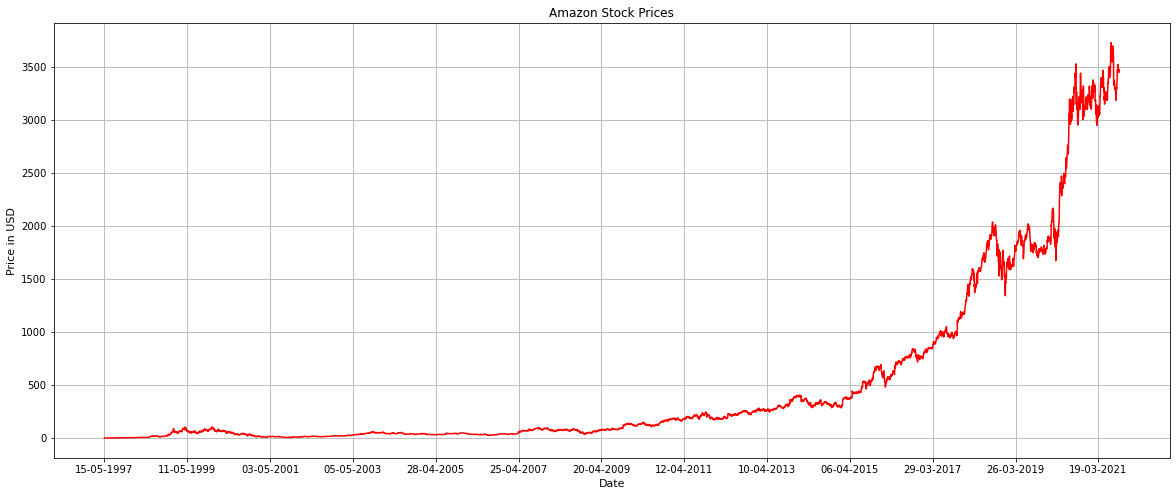

In [15]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(data['Date'], data['Close'], color='Red')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Price in USD', fontsize='11')
plt.title('Amazon Stock Prices')
plt.grid()
plt.show()

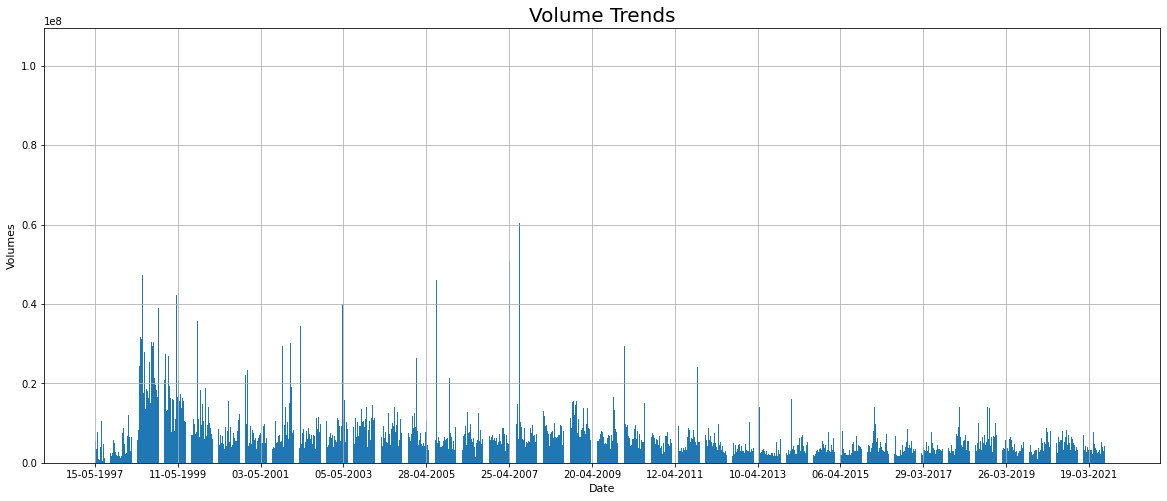

In [16]:
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(data['Date'], data['Volume'])
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Volumes', fontsize='11')
plt.title('Volume Trends', fontsize='20')
plt.grid()
plt.show()


In [20]:
data['Market Camp'] = data['Open']*data['Volume']

In [21]:
data.iloc[data['Market Camp'].argmax()]

Date                 30-07-2021
Open                3347.949951
High                3368.139893
Low                  3306.97998
Close               3327.590088
Volume                  9957100
Market Camp    33335872457.1021
Name: 6092, dtype: object

In [22]:
data['vol'] = (data['Close']/data['Close'].shift(1)) - 1

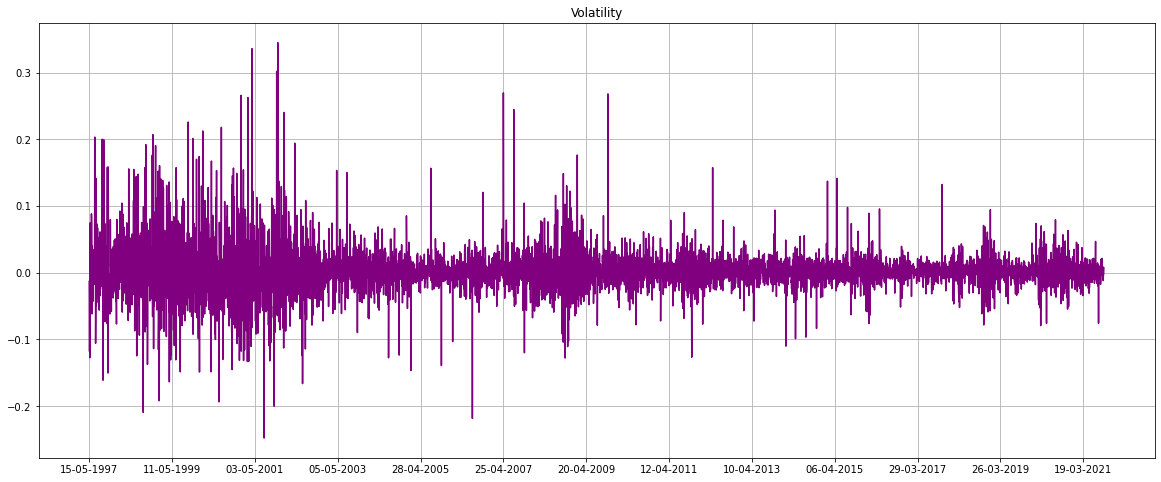

In [24]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(data['Date'], data['vol'], color='purple')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
plt.title('Volatility')
plt.grid()
plt.show()


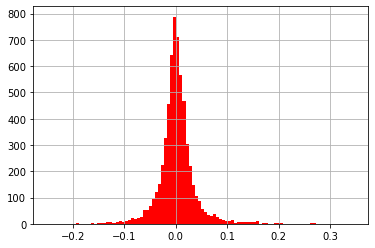

In [26]:
data['vol'].hist(bins=100, color='red');


In [27]:
data['Cumulative Return'] = (1 + data['vol']).cumprod()

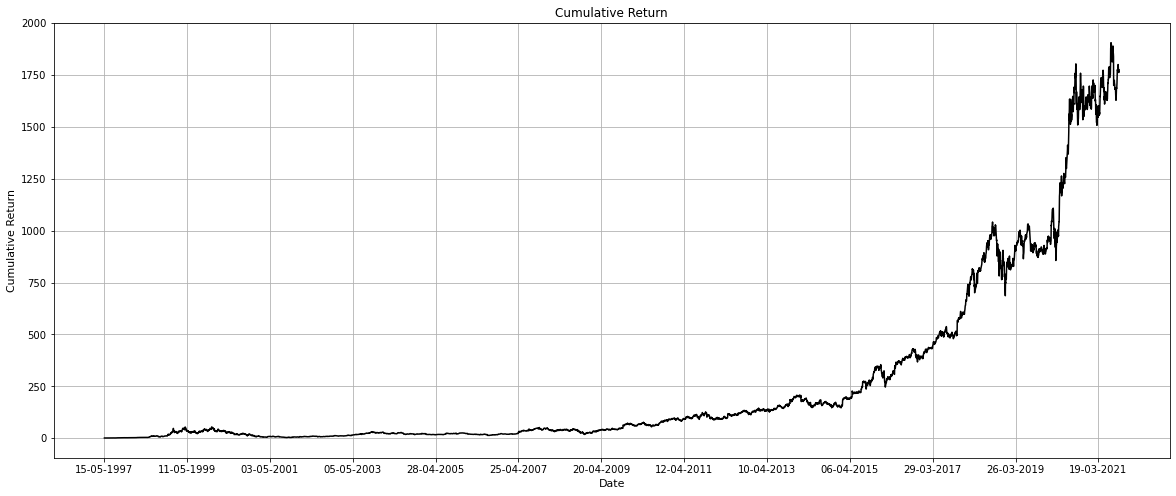

In [28]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(data['Date'], data['Cumulative Return'], color='black')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Cumulative Return', fontsize='11')
plt.title('Cumulative Return')
plt.grid()
plt.show()


In [29]:
data.iloc[data['Cumulative Return'].argmax()]

Date                         08-07-2021
Open                        3643.560059
High                         3759.98999
Low                         3621.120117
Close                       3731.409912
Volume                          5180600
Market Camp          18875827241.655399
vol                            0.009422
Cumulative Return            1905.40113
Name: 6076, dtype: object

In [30]:
from sklearn.preprocessing import MinMaxScaler
from keras.modelsdels import Sequential
from keras.layers import Dense, LSTM
import math

In [ ]:
data['Date'] = pd.to_datetime(amazon_data['Date'])
data.set_index('Date',inplace=True)
